In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [6]:
dataset = pd.read_csv("Mall_Customers.csv") 

In [8]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
x = dataset.iloc[:,[3,4]].values 

In [10]:
from sklearn.cluster import KMeans 

In [16]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) 

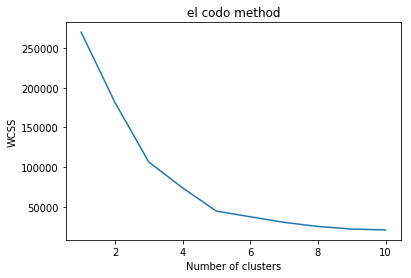

In [17]:
# Usamos el metodo del codo(metodo analisis grafico) para elegir el numero de clusters
plt.plot(range(1,11), wcss)
plt.title("el codo method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [18]:
#Se puede apreciar que en el valor 5 de numero de grupos presenta un pico donde comienza a bajar demanera mas lenta


In [23]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x) 

In [24]:
y_kmeans 

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

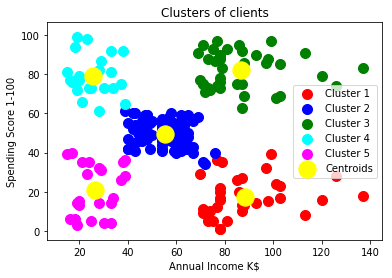

In [32]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans == 0, 1], s = 100, c = "red", label = "Cluster 1")
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans == 1, 1], s = 100, c = "blue", label = "Cluster 2")
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans == 2, 1], s = 100, c = "green", label = "Cluster 3")
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans == 3, 1], s = 100, c = "cyan", label = "Cluster 4")
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans == 4, 1], s = 100, c = "magenta", label = "Cluster 5") 
plt.scatter ( kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = "yellow", label = "Centroids")
plt.title("Clusters of clients")
plt.xlabel("Annual Income K$")
plt.ylabel ("Spending Score 1-100")
plt.legend()
plt.show() 